In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import glob
import rasterio
import pickle

from tqdm import tqdm
from matplotlib import pyplot as plt
from pylab import rcParams

from PIL import Image
rcParams['figure.figsize'] = 10, 10

In [2]:
main_input_dir = "../input/radiant-ref-agrifieldnet-competition-v1/content/ref_agrifieldnet_competition_v1"

json_files = glob.glob(f"{main_input_dir}/**/*.json", recursive=True)
json_files = [f for f in json_files if "ref_agrifieldnet_competition_v1_labels" in f]
print(len(json_files))

json_files = [f for f in json_files if "collection" not in f]
print(len(json_files))
json_files[:3], json_files[-3:]

1874
1872


(['../input/radiant-ref-agrifieldnet-competition-v1/content/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_labels_test/ref_agrifieldnet_competition_v1_labels_test_38086/ref_agrifieldnet_competition_v1_labels_test_38086.json',
  '../input/radiant-ref-agrifieldnet-competition-v1/content/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_labels_test/ref_agrifieldnet_competition_v1_labels_test_e1a50/ref_agrifieldnet_competition_v1_labels_test_e1a50.json',
  '../input/radiant-ref-agrifieldnet-competition-v1/content/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_labels_test/ref_agrifieldnet_competition_v1_labels_test_ca464/ref_agrifieldnet_competition_v1_labels_test_ca464.json'],
 ['../input/radiant-ref-agrifieldnet-competition-v1/content/ref_agrifieldnet_competition_v1/ref_agrifieldnet_competition_v1_labels_train/ref_agrifieldnet_competition_v1_labels_train_b2a94/ref_agrifieldnet_competition_v1_labels_train_b2a94.json',
  '../input/radiant-ref-

In [3]:
train_folder_ids = [f for f in json_files if "_train_" in f]
test_folder_ids = [f for f in json_files if "_test_" in f]

train_folder_ids = [f.split('_')[-1].split('.')[0] for f in train_folder_ids]
test_folder_ids = [f.split('_')[-1].split('.')[0] for f in test_folder_ids]

print(len(train_folder_ids), len(test_folder_ids))
print(train_folder_ids[:1], train_folder_ids[-1:])
print(test_folder_ids[:1], test_folder_ids[-1:])

train_folder_ids.sort()
test_folder_ids.sort()

print(len(train_folder_ids), len(test_folder_ids))
print(train_folder_ids[:1], train_folder_ids[-1:])
print(test_folder_ids[:1], test_folder_ids[-1:])

1165 707
['9f1f1'] ['f1622']
['38086'] ['63409']
1165 707
['001c1'] ['ffe8c']
['001c1'] ['ffde0']


In [4]:
#root_input_dir = "../input/radiant-ref-agrifieldnet-competition-v1/content/ref_agrifieldnet_competition_v1"
image_dir_pattern = main_input_dir + "/" + \
    "ref_agrifieldnet_competition_v1_source/" + \
    "ref_agrifieldnet_competition_v1_source_fffff"

folder_dir_pattern = main_input_dir + "/" + \
    "ref_agrifieldnet_competition_v1_labels_ddddd/" + \
    "ref_agrifieldnet_competition_v1_labels_ddddd_fffff"

image_channels = ["B04", "B02", "B03"] # blue (B2), green (B3), red (B4),
def get_image_from_folder_id(folder_id, dataset="train", max_value=150, debug=False):
    image_dir_file = image_dir_pattern.replace("fffff", folder_id)
    
    if debug:
        print(image_dir_file)
        
    img = []
    for c in image_channels:
        image_filename = f"{image_dir_file}/{c}.tif"
        with rasterio.open(image_filename) as src:
            field_data = src.read()[0]
            img.append(field_data)
            
    im = np.stack(img, axis=0)
    im = np.transpose(im, axes=(1, 2, 0)) # image shape as (H, W, D)

    #im = (((im-im.min())/(im.max()-im.min())*255)).astype(np.uint8)
    
    im = ((im/max_value)*255).astype(np.uint8)
    return im

def get_field_ids(folder_id, dataset="train", debug=False):
    folder_dir_file = folder_dir_pattern.replace("fffff", folder_id).replace("ddddd", dataset)
    field_id_file = f"{folder_dir_file}/field_ids.tif"
    
    with rasterio.open(field_id_file) as src:
        field_data = src.read()[0]
        
    return field_data

if False:
    folder_id = "ffe8c"
    print(folder_id)
    img = get_image_from_folder_id(folder_id, debug=True)
    print(len(img), img.shape, img.max())

    field_data = get_field_ids(folder_id, debug=True)
    print(len(field_data), field_data.shape, field_data.max())

    field_ids = list(set(field_data.flatten()))
    field_ids = [f for f in field_ids if f > 0]
    field_ids.sort()

    print(field_ids)
    
    i = 0
    field_id = field_ids[i]
    mask = (field_data == field_id).astype(int)
    mask.sum()

Processing folder 04867 ...
Processing field_id 218 ...
Processing field_id 454 ...
Processing field_id 504 ...
Processing field_id 506 ...
Processing field_id 799 ...
Processing field_id 919 ...
Processing field_id 922 ...
Processing field_id 938 ...
Processing field_id 958 ...
Processing field_id 1072 ...
Processing field_id 1073 ...
Processing field_id 1074 ...
Processing field_id 1075 ...
Processing field_id 1076 ...
Processing field_id 1077 ...
Processing field_id 1141 ...
Processing field_id 1187 ...
Processing field_id 1188 ...
Processing field_id 1335 ...
img: (256, 256, 3)
center: [224 181]
neighbours: 160, 224, 117, 224
(64, 64, 3) 73.71622721354167
(64, 64, 3) 72.85693359375
(64, 64, 3) 73.71622721354167
(64, 64, 3) 70.49397786458333
(64, 64, 3) 75.32259114583333
images/train/04867_1335_main.png 103.46158854166667
images/train/04867_1335_north.png 98.12109375
images/train/04867_1335_south.png 103.46158854166667
images/train/04867_1335_west.png 83.40966796875
images/train/048

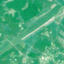

In [5]:
def get_field_image(img, field_data, field_id, min_xy=32, max_xy=224): # 64/2, 256-min_xy # 224
    mask_index = np.argwhere(field_data == field_id)
    center = np.round(mask_index.mean(axis=0)).astype(int)
    center = np.clip(center, min_xy, max_xy)
    
    img_field = img[center[0]-min_xy:center[0]+min_xy, 
               center[1]-min_xy:center[1]+min_xy, 
               :]
    return img_field

def get_neighbour_images(img, field_data, field_id, min_xy=32, max_xy=224, debug=False): # 64/2, 256-min_xy # 224
    
    mask_index = np.argwhere(field_data == field_id)
    center = np.round(mask_index.mean(axis=0)).astype(int)
    center = np.clip(center, min_xy, max_xy)
    
    north = center[0] - min_xy*2
    if north < min_xy:
        north = min_xy
    south = center[0] + min_xy*2
    if south > max_xy:
        south = max_xy
        
    west = center[1] - min_xy*2
    if west < min_xy:
        west = min_xy
    east = center[1] + min_xy*2
    if east > max_xy:
        east = max_xy
    
    if debug:
        print("center:", center)
        print(f"neighbours: {north}, {south}, {west}, {east}")
    
    img_field = img[center[0]-min_xy:center[0]+min_xy, 
                   center[1]-min_xy:center[1]+min_xy, 
                   :].copy()
    img_field_north = img[north-min_xy:north+min_xy, 
                   center[1]-min_xy:center[1]+min_xy, 
                   :].copy()
    img_field_south = img[south-min_xy:south+min_xy, 
                   center[1]-min_xy:center[1]+min_xy, 
                   :].copy()
    img_field_west = img[center[0]-min_xy:center[0]+min_xy, 
                   west-min_xy:west+min_xy, 
                   :].copy()
    img_field_east = img[center[0]-min_xy:center[0]+min_xy, 
                   east-min_xy:east+min_xy, 
                   :].copy()
    outputs = [img_field, img_field_north, img_field_south, img_field_west, img_field_east]
    if debug:
        for o in outputs:
            print(o.shape, o.mean())
            
    return outputs

def process_folder(folder_id, dataset="train", output_dir="images", 
                   is_scale=True, debug=False):    
    if debug:
        print(f"Processing folder {folder_id} ...")
        
    img = get_image_from_folder_id(folder_id, dataset=dataset)
    field_data = get_field_ids(folder_id, dataset=dataset)

    field_ids = list(set(field_data.flatten()))
    field_ids = [f for f in field_ids if f > 0]
    field_ids.sort()
    

    for field_id in field_ids:
        # img_field = get_field_image(img, field_data, field_id)
        if debug:
            print(f"Processing field_id {field_id} ...")
            
        sub_debug = False
        if field_id in [1335]:
            sub_debug = True
            print("img:", img.shape)
        
        arr_img_field = get_neighbour_images(img, field_data, field_id, debug=sub_debug)

        for img_field, orientation in zip(arr_img_field, ["main", "north", "south", "west", "east"]):
            field_filename = f"{output_dir}/{dataset}/{folder_id}_{field_id}_{orientation}.png"
            im = img_field.copy()
            if is_scale:
                im = (((im-im.min())/(im.max()-im.min())*255)).astype(np.uint8)
            
            if sub_debug:
                print(field_filename, im.mean())
                
            im = Image.fromarray(im)
            im.save(field_filename)

        
!mkdir -p images/train
!mkdir -p images/test
folder_id = "04867"
process_folder(folder_id, debug=True)

folder_id = "001c1"
process_folder(folder_id, dataset="test", debug=True)

from IPython.display import display
display(Image.open("images/test/001c1_6533_main.png"))

In [6]:
for dataset, folder_ids in zip(["train", "test"], 
                               [train_folder_ids, test_folder_ids]):
    print("-"*40)
    print(f"Processing {dataset} ...")
    for folder_id in tqdm(folder_ids):
        process_folder(folder_id, dataset=dataset, debug=False)
    print("-"*40)

----------------------------------------
Processing train ...


  2%|▏         | 18/1165 [00:02<02:36,  7.34it/s]

img: (256, 256, 3)
center: [224 181]
neighbours: 160, 224, 117, 224
(64, 64, 3) 73.71622721354167
(64, 64, 3) 72.85693359375
(64, 64, 3) 73.71622721354167
(64, 64, 3) 70.49397786458333
(64, 64, 3) 75.32259114583333
images/train/04867_1335_main.png 103.46158854166667
images/train/04867_1335_north.png 98.12109375
images/train/04867_1335_south.png 103.46158854166667
images/train/04867_1335_west.png 83.40966796875
images/train/04867_1335_east.png 98.21232096354167


100%|██████████| 1165/1165 [01:47<00:00, 10.79it/s]


----------------------------------------
----------------------------------------
Processing test ...


100%|██████████| 707/707 [00:38<00:00, 18.44it/s]

----------------------------------------


In [7]:
!ls images/train | wc
!ls images/test | wc

  29100   29100  589230
   8030    8030  162502
